# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Load Dataset**

In [ ]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})


# **Preprocessing**

In [ ]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

# Text cleaning function
def clean_text(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [''.join(char for char in word if char not in punctuations) for word in tokens]
    return ' '.join(tokens)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


# **Vectorization**

In [ ]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']


# **Train/Test Split**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training**

In [ ]:
# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# **Evaluation**

Accuracy: 0.67
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.62      0.44      0.51       151
           comp.graphics       0.55      0.61      0.58       202
 comp.os.ms-windows.misc       0.61      0.61      0.61       195
comp.sys.ibm.pc.hardware       0.50      0.65      0.56       183
   comp.sys.mac.hardware       0.75      0.56      0.64       205
          comp.windows.x       0.74      0.78      0.76       215
            misc.forsale       0.77      0.67      0.72       193
               rec.autos       0.72      0.67      0.69       196
         rec.motorcycles       0.41      0.73      0.53       168
      rec.sport.baseball       0.86      0.77      0.81       211
        rec.sport.hockey       0.87      0.86      0.87       198
               sci.crypt       0.76      0.77      0.77       201
         sci.electronics       0.71      0.58      0.64       202
                 sci.med       0.81  

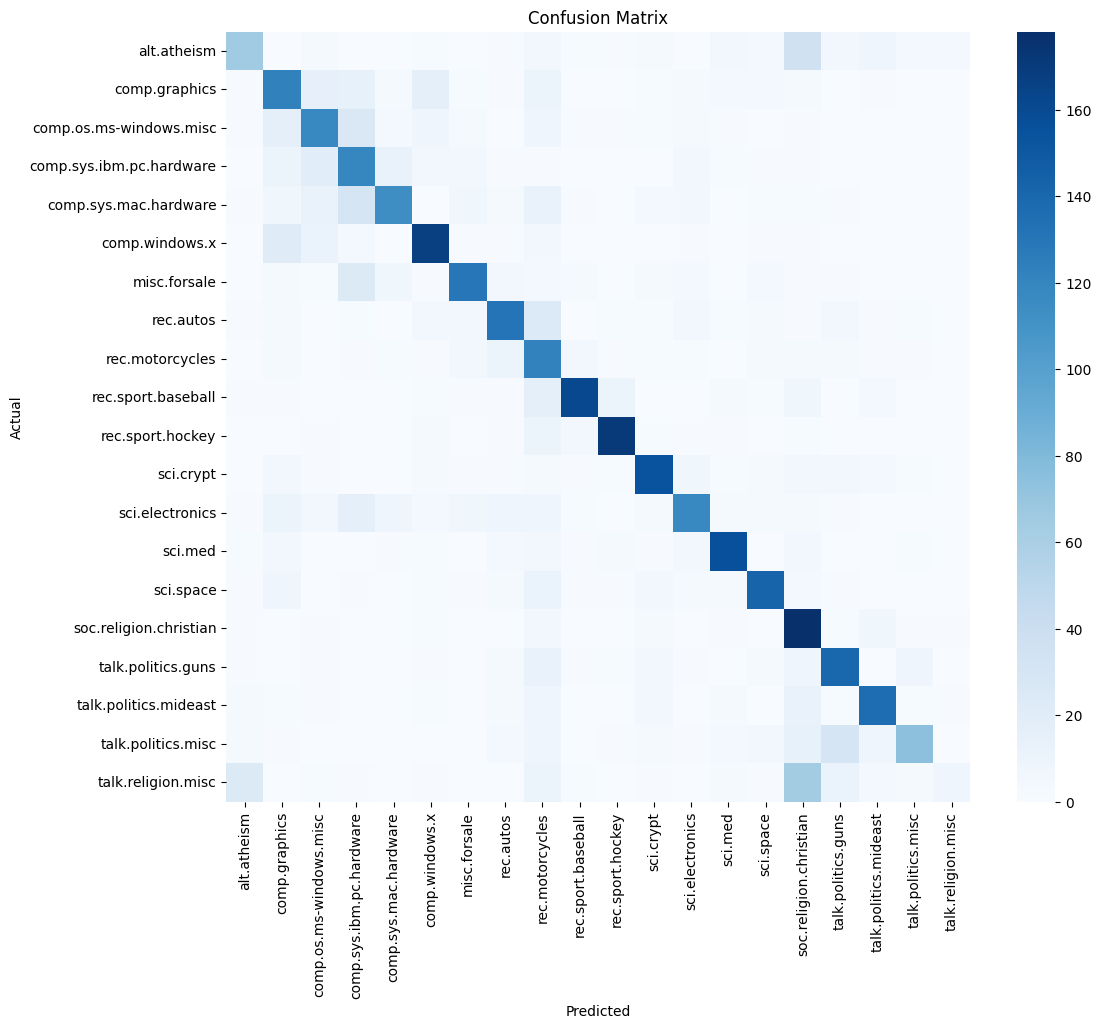

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
